<a href="https://colab.research.google.com/github/saffarizadeh/INSY4054/blob/main/Lfw_People_Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/stpeteishii/lfw-people-conv2d

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
!mkdir input
!mkdir input/lfw_people
!mkdir LFW
!mkdir LFW/lfw_home

In [7]:
lfw_dataset = fetch_lfw_people(data_home='LFW',min_faces_per_person=100,download_if_missing=True)

In [8]:
print(lfw_dataset.images.shape)
print(lfw_dataset.data.shape)
print(lfw_dataset.target_names.shape)
print(lfw_dataset.target.shape)

(1140, 62, 47)
(1140, 2914)
(5,)
(1140,)


In [9]:
lfw_dataset.target

array([2, 3, 1, ..., 4, 2, 4])

In [10]:
Name = lfw_dataset.target_names

print(Name)
print(len(Name))

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
5


In [11]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [12]:
X0=lfw_dataset.images
y=lfw_dataset.target

In [13]:
print(X0.shape)
X=X0.reshape(-1,62,47,1)
print(X.shape)

(1140, 62, 47)
(1140, 62, 47, 1)


In [14]:
dataset=[]
testset=[]
t=0
for Xi,yi in zip(X,y):
    img=Xi/255.0
    if t<=200:
        dataset.append([img,yi])
    else:   
        testset.append([img,yi])
    t+=1

In [15]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [16]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [17]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [18]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [19]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(160, 62, 47, 1)
(41, 62, 47, 1)
(160, 5)
(41, 5)


In [20]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                    width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), input_shape=(62,47,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=5, activation='softmax')
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 60, 45, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 10, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4480)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               2294272   
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=100, verbose=0) #change to 1000 epochs

In [25]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground=np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       1.00      0.38      0.55         8
           2       0.41      1.00      0.58        15
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         6

    accuracy                           0.46        41
   macro avg       0.48      0.30      0.27        41
weighted avg       0.54      0.46      0.36        41



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


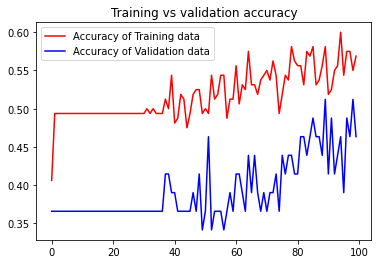

<Figure size 432x288 with 0 Axes>

In [26]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

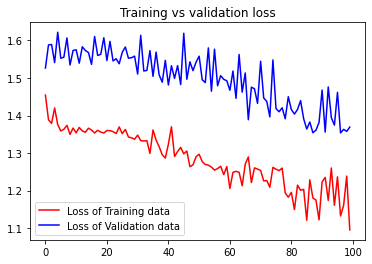

<Figure size 432x288 with 0 Axes>

In [27]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [28]:
def plot_gallery(images, titles, h, w, n_row=1, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

(4, 62, 47, 1)
(4, 2914)


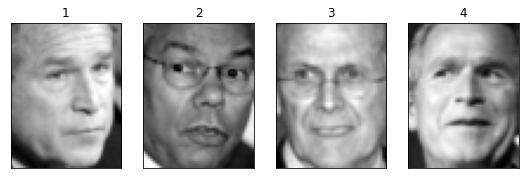

In [29]:
test1=test[0:4].reshape(4,62*47)
plot_gallery(test1,'1234',62,47)
print(test[0:4].shape)
print(test1.shape)

In [30]:
prediction_image=test[0:4]
prediction=model.predict(prediction_image)
print(prediction)

[[0.06306764 0.02026575 0.75371146 0.02112609 0.1418291 ]
 [0.09525353 0.01221134 0.80098635 0.03366718 0.05788169]
 [0.12080988 0.17003193 0.4327861  0.08197991 0.19439219]
 [0.02913602 0.02884247 0.8089392  0.04541366 0.08766878]]


In [31]:
for i in range(4):
    value=np.argmax(prediction[i])
    name=mapper(value)
    print("Prediction {} is {}.".format(i+1,name))

Prediction 1 is George W Bush.
Prediction 2 is George W Bush.
Prediction 3 is George W Bush.
Prediction 4 is George W Bush.


In [32]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

PRED=[]
for item in prediction2:
    value2=np.argmax(item)      
    PRED+=[value2]

(939, 62, 47, 1)
(939, 5)


In [33]:
ANS=tlabels0
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.5260915867944622
